In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Loading processed data from the previous step
data = pd.read_csv('kidney_disease_final.csv')
X = data.drop('classification', axis=1)
y = data['classification']

# Stratified split to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (297, 24)
Testing set size: (100, 24)


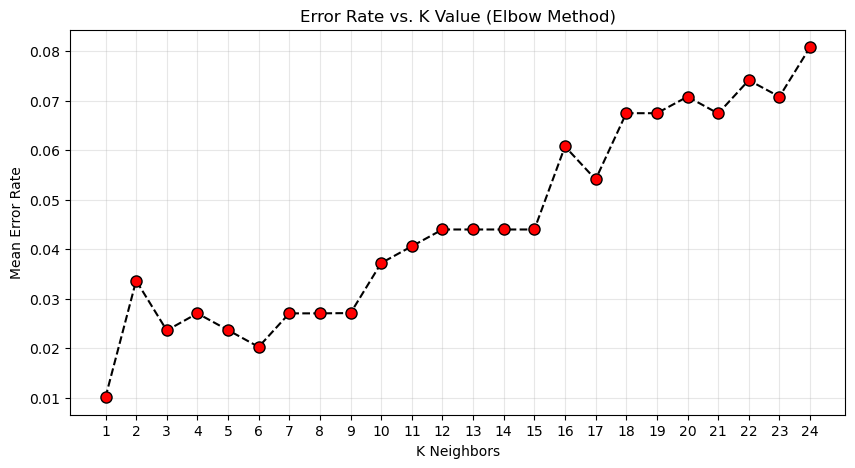

In [2]:
error_rate = []

# Testing K values from 1 to 25
for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i)
    # Using 5-fold cross validation for a more stable error estimate
    score = cross_val_score(knn, X_train, y_train, cv=5)
    error_rate.append(1 - score.mean())

# Plotting the "Elbow" to choose K
plt.figure(figsize=(10, 5))
plt.plot(range(1, 25), error_rate, color='black', linestyle='--', marker='o', 
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value (Elbow Method)')
plt.xlabel('K Neighbors')
plt.ylabel('Mean Error Rate')
plt.xticks(range(1, 25))
plt.grid(True, alpha=0.3)
plt.show()

In [3]:
# Based on the elbow plot, we select the best K (let's assume K=5 for now)
optimal_k = 5 
final_knn = KNeighborsClassifier(n_neighbors=optimal_k, metric='minkowski', p=2)
final_knn.fit(X_train, y_train)

# Predictions
y_pred = final_knn.predict(X_test)

print(f"Model trained with K={optimal_k}")

Model trained with K=5


In [4]:
# Initial evaluation
print("--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# Checking for Overfitting
train_acc = final_knn.score(X_train, y_train)
test_acc = final_knn.score(X_test, y_test)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

--- Confusion Matrix ---
[[37  1]
 [ 2 60]]

--- Classification Report ---
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96        38
         1.0       0.98      0.97      0.98        62

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100

Train Accuracy: 0.9865
Test Accuracy: 0.9700
